In [1]:
# Regular Exploratory data analysis and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from sci-kit learn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import classification_report, f1_score, RocCurveDisplay, recall_score, precision_score  
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")

## Data Exploration (exploratory data analysis or EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

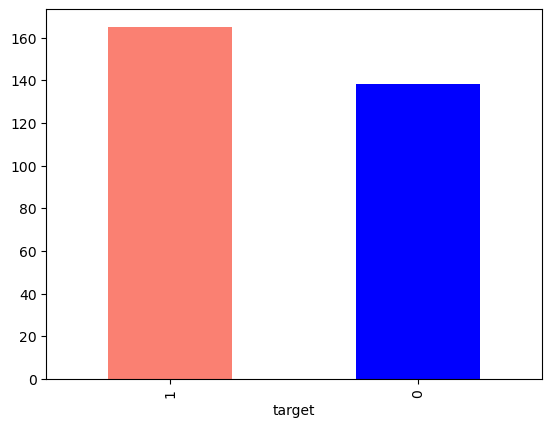

In [3]:
df["target"].value_counts().plot(kind ="bar", color = ["salmon", "blue"]); df.info(); df.isna().sum()

## Finding pattern 
### Heart Disease Frequency according to Sex

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

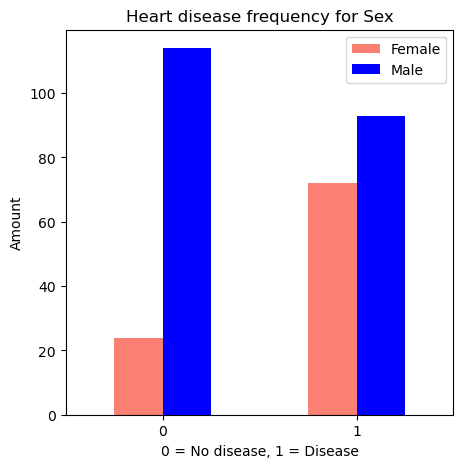

In [4]:
df.sex.value_counts();

# Compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (5, 5), color = ["salmon", "blue"])
plt.title("Heart disease frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

Text(0.5, 1.0, 'Heart Disease in function of Age and Max Heart Rate')

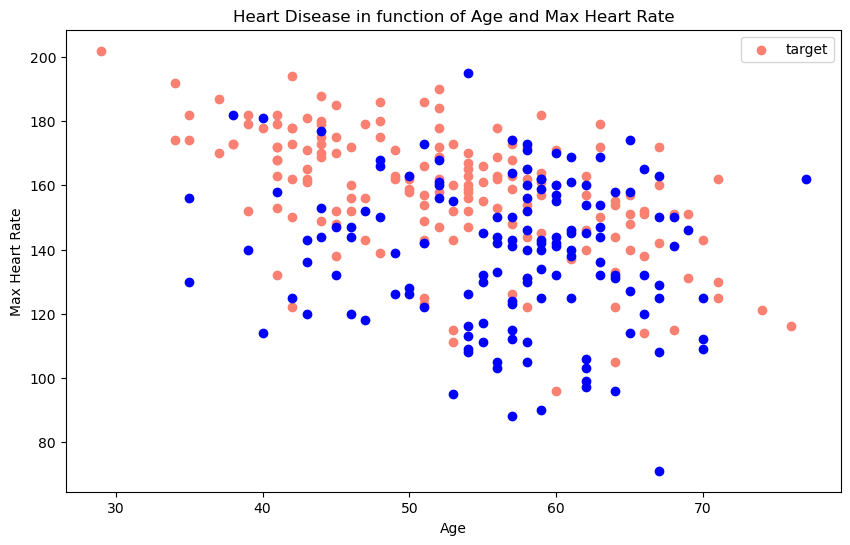

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c = "salmon")
plt.ylabel("Max Heart Rate")
plt.xlabel("Age")
plt.legend(["target"])
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c = "blue")
plt.title("Heart Disease in function of Age and Max Heart Rate")

<Axes: ylabel='Frequency'>

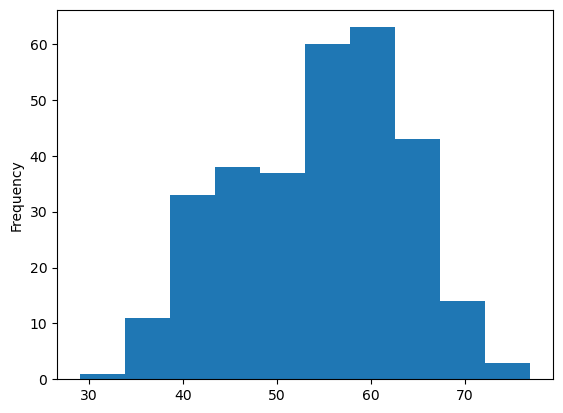

In [6]:
# Check distribution/Spread of the age column with a histogram
df["age"].plot.hist()

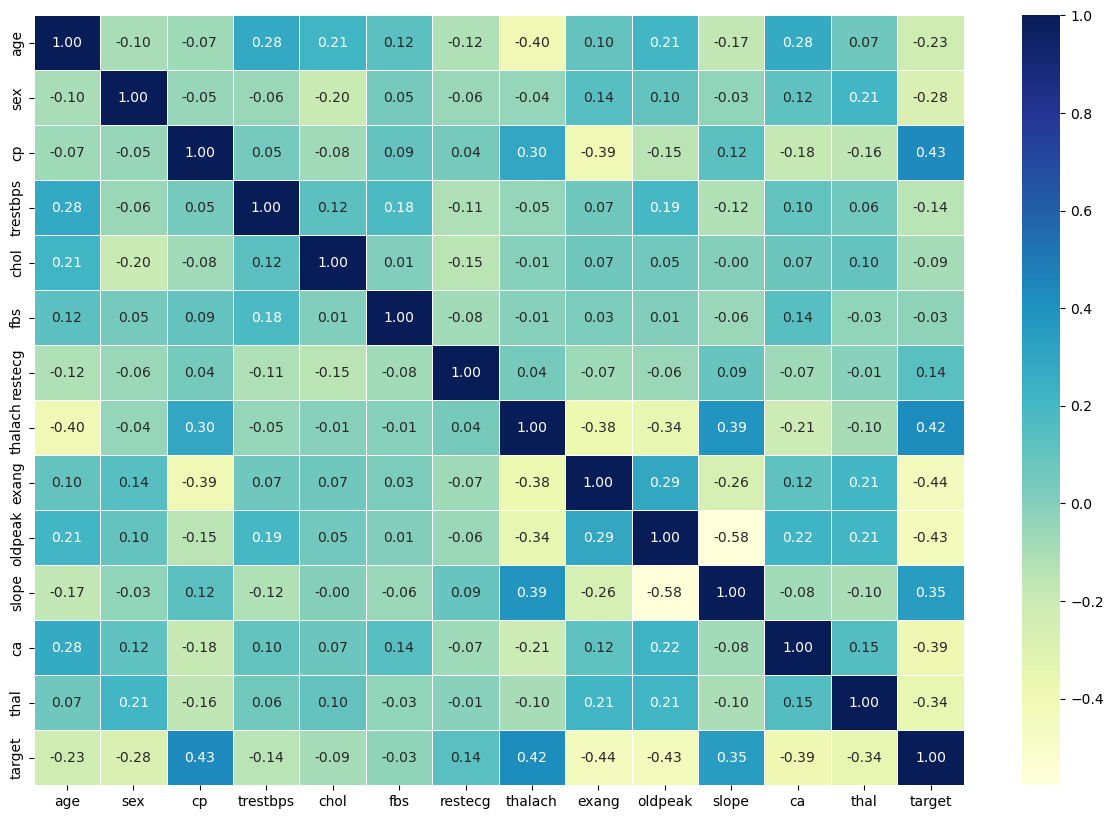

In [7]:
# Make a correlation matrix
df.corr()
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt = ".2f", cmap = "YlGnBu")

## Modelling

In [8]:
# Split data into x and y
x = df.drop("target", axis = 1)
y = df["target"]
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Choosing the right model
models = {"Logistic Regression" : LogisticRegression(max_iter=1000, n_jobs=-1),
         "KNN" : KNeighborsClassifier(n_neighbors=50),
         "Random Forest" : RandomForestClassifier(n_estimators=2000)}
# Create a function to fit and score models 
def fit_and_score(models, x_train, x_test, y_train, y_test):
    # Make a list to keep track of model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [9]:
model_scores = fit_and_score(models = models, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.7377049180327869,
 'Random Forest': 0.8688524590163934}

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

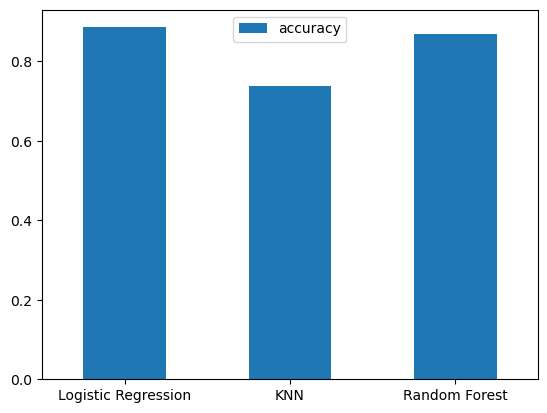

In [10]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation = 0)

## Hyperparameter tuning

In [11]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for N Neighbors 
neighbors = range(1, 21)

# Setup KNN instances
knn = KNeighborsClassifier()

# Loop through different N Neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit in the model
    knn.fit(x_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update test scores
    knn.score(x_test, y_test)
    test_scores.append(knn.score(x_test, y_test))
train_scores; test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN scores on the test data: 75.41


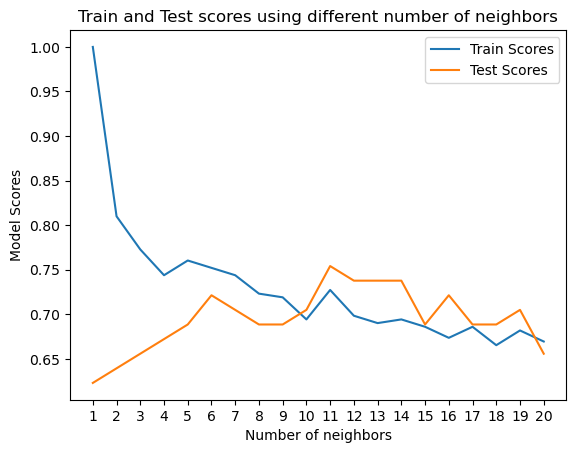

In [12]:
plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label = "Test Scores")
plt.xlabel("Number of neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model Scores")
plt.title("Train and Test scores using different number of neighbors")
plt.legend()
print(f"Maximum KNN scores on the test data: {max(test_scores)*100:.2f}")
# Since our knn neighbours only improve upto 75.41%, we'll discard this model/algorithm

### Hyperparameter tuning with RandomizedSearchCV

In [13]:
log_reg_grid = {
    "C" : np.logspace(-4, 4, 20), "solver" : ["liblinear"]}

# Create hyperparameter grid for random forest classfier
rf_grid = {"n_estimators" : np.arange(10, 1000, 250), "max_depth" : [None, 3, 5], "min_samples_split" : np.arange(2,, 2),
          "min_samples_leaf" : np.arange(1, 30, 3)}

In [14]:
# Tune LogisticRegression Model
np.random.seed(42)

# Setup Random Hyperparameter search for LR Model
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv = 10, n_iter=20, verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)
rs_log_reg.best_params_
rs_log_reg.score(x_test, y_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


0.8524590163934426

In [15]:
# Tuning RandomForestClassifier()
np.random.seed(42)

# Setup Random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions= rf_grid, cv = 5, n_iter=20, verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)
rs_rf.best_params_
rs_rf.score(x_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

In [16]:
# Different hyperparameters for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv = 10, verbose = True)
gs_log_reg.fit(x_train, y_train)
gs_log_reg.best_params_
gs_log_reg.score(x_test, y_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


0.8524590163934426

In [ ]:
gs_rf = GridSearchCV(RandomForestClassifier(n_jobs = -1), param_grid=rf_grid, cv = 1, verbose = True)
gs_rf.fit(x_train, y_train)
gs_rf.best_params_
gs_rf.score(x_test, y_test)

## Evaluating our Tuned Machine Learning classifier, beyond accuracy

In [ ]:
# Make Predictions with Tuned Model
y_preds = gs_log_reg.predict(x_test)
RocCurveDisplay(gs_log_reg, x_test, y_preds)

In [ ]:
# Print Confussion Matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test, y_preds):
    fig, ax =plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True,
                    cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Predicted Vs True Label's Graph")
plot_conf_matrix(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
# Checking the best hyperparameters
gs_log_reg.best_params_

In [ ]:
# Create a new classifier with best parameters 
clf = LogisticRegression()

# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring = "f1_score")
cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
# Visualizing the Cross-Validted matric
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                         "Precision" : cv_precision,
                         "Recall" : cv_recall,
                         "F1 Score" : cv_f1}, index = [0])
cv_metrics.T.plot.bar(title = "Cross-Validated Classification Metrics", legend = False)
plt.xticks(rotation = 0)

### Feature importance

In [ ]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")

clf.fit(x_train, y_train)

In [ ]:
# Check coef_
clf.coef_

# Manipulating it to make it more readable (Match coef's of features to column)
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

In [ ]:
# Visualise feature importance
feature_df = pd.DataFrame(features_dict, index = [0])
features_dict.T.plot.bar(title = "Features Importance")